# Data Analytics on 5000 IMDB movies

Importing the necessary libraries.

In [85]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

Loading the data set.

In [57]:
df = pd.read_csv('D:/Desktop/proging/IMDB Data Analyse/movies_data.csv')
pd.set_option('display.max_columns', 60) 
pd.set_option('display.line_width', 5000) 
print("The size of the data set is", df.shape, ".")
df.head()

The size of the data set is (5043, 28) .


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Creating a "sub"-dataset of the attributes we need.

In [58]:
idf = df.loc[:, ("director_name", "movie_title", "imdb_score", "duration", "genres", "country", "title_year", "budget", "gross")]
print(idf.axes)
idf[:10]

[RangeIndex(start=0, stop=5043, step=1), Index(['director_name', 'movie_title', 'imdb_score', 'duration', 'genres',
       'country', 'title_year', 'budget', 'gross'],
      dtype='object')]


,director_name,movie_title,imdb_score,duration,genres,country,title_year,budget,gross
0,James Cameron,Avatar,7.9,178.0,Action|Adventure|Fantasy|Sci-Fi,USA,2009.0,237000000.0,760505847.0
1,Gore Verbinski,Pirates of the Caribbean: At World's End,7.1,169.0,Action|Adventure|Fantasy,USA,2007.0,300000000.0,309404152.0
2,Sam Mendes,Spectre,6.8,148.0,Action|Adventure|Thriller,UK,2015.0,245000000.0,200074175.0
3,Christopher Nolan,The Dark Knight Rises,8.5,164.0,Action|Thriller,USA,2012.0,250000000.0,448130642.0
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,Documentary,NaN,NaN,NaN,NaN
5,Andrew Stanton,John Carter,6.6,132.0,Action|Adventure|Sci-Fi,USA,2012.0,263700000.0,73058679.0
6,Sam Raimi,Spider-Man 3,6.2,156.0,Action|Adventure|Romance,USA,2007.0,258000000.0,336530303.0
7,Nathan Greno,Tangled,7.8,100.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,USA,2010.0,260000000.0,200807262.0
8,Joss Whedon,Avengers: Age of Ultron,7.5,141.0,Action|Adventure|Sci-Fi,USA,2015.0,250000000.0,458991599.0
9,David Yates,Harry Potter and the Half-Blood Prince,7.5,153.0,Adventure|Family|Fantasy|Mystery,UK,2009.0,250000000.0,301956980.0


Now we do a simply bar plot, indicating the movies per country.

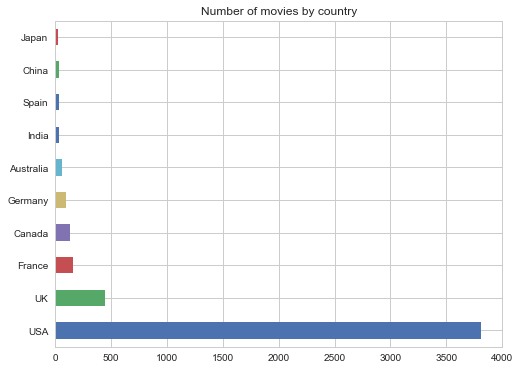

In [111]:
df["country"].value_counts()[:10].plot(kind="barh", figsize=(8, 6), title="Number of movies by country")

Bar plot of movies per director.

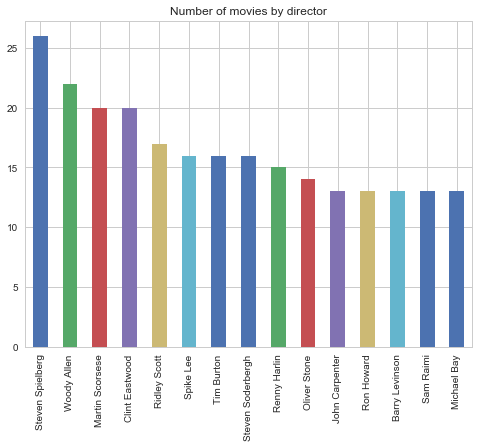

In [110]:
sb.set_style("whitegrid")
df["director_name"].value_counts()[:15].plot(kind="bar", figsize=(8, 6), title="Number of movies by director")

Univariate distribution of Steven Spielbergs IMDB movie scores.

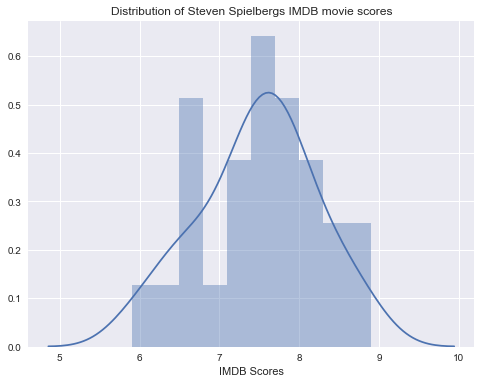

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Distribution of Steven Spielbergs IMDB movie scores")
sb.set()
sb.distplot(idf[idf["director_name"]=="Steven Spielberg"]["imdb_score"], bins=10, axlabel="IMDB Scores", ax=ax)

The dataset is obviously incomplete, hence we can't list all Tarantino movies (e.g. Death proof is missing).

In [91]:
idf[idf["director_name"]=="Quentin Tarantino"]

,director_name,movie_title,imdb_score,duration,genres,country,title_year,budget,gross
296,Quentin Tarantino,Django Unchained,8.5,165.0,Drama|Western,USA,2012.0,100000000.0,162804648.0
588,Quentin Tarantino,Inglourious Basterds,8.3,153.0,Adventure|Drama|War,USA,2009.0,75000000.0,120523073.0
706,Quentin Tarantino,The Hateful Eight,7.9,187.0,Crime|Drama|Mystery|Thriller|Western,USA,2015.0,44000000.0,54116191.0
855,Quentin Tarantino,Kill Bill: Vol. 1,8.1,111.0,Action,USA,2003.0,30000000.0,70098138.0
858,Quentin Tarantino,Kill Bill: Vol. 2,8.0,137.0,Action|Crime|Drama|Thriller,USA,2004.0,30000000.0,66207920.0
2930,Quentin Tarantino,Jackie Brown,7.5,154.0,Crime|Thriller,USA,1997.0,12000000.0,39647595.0
3355,Quentin Tarantino,Pulp Fiction,8.9,178.0,Crime|Drama,USA,1994.0,8000000.0,107930000.0
4496,Quentin Tarantino,Reservoir Dogs,8.4,99.0,Crime|Drama|Thriller,USA,1992.0,1200000.0,2812029.0


We will now calculate a "profit" of a movie given its gross and budget value.

In [94]:
profit = df.loc[:,('gross')]-df.loc[:,('budget')]
idf.loc[:,("profit")]=profit
idf.head()

,director_name,movie_title,imdb_score,duration,genres,country,title_year,budget,gross,profit
0,James Cameron,Avatar,7.9,178.0,Action|Adventure|Fantasy|Sci-Fi,USA,2009.0,237000000.0,760505847.0,523505847.0
1,Gore Verbinski,Pirates of the Caribbean: At World's End,7.1,169.0,Action|Adventure|Fantasy,USA,2007.0,300000000.0,309404152.0,9404152.0
2,Sam Mendes,Spectre,6.8,148.0,Action|Adventure|Thriller,UK,2015.0,245000000.0,200074175.0,-44925825.0
3,Christopher Nolan,The Dark Knight Rises,8.5,164.0,Action|Thriller,USA,2012.0,250000000.0,448130642.0,198130642.0
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,Documentary,NaN,NaN,NaN,NaN,NaN


In [99]:
director_avg_profit = idf.groupby("director_name")["profit"].mean()
director_avg_profit[director_avg_profit.notnull()].sort_values()

director_name
Joon-ho Bong            -6.123968e+09
Lajos Koltai            -2.499804e+09
Katsuhiro Ôtomo         -1.613335e+09
Chan-wook Park          -1.403635e+09
Takao Okawara           -9.899626e+08
Carlos Saura            -6.983127e+08
Hayao Miyazaki          -6.112149e+08
Anurag Basu             -5.983975e+08
Chatrichalerm Yukol     -3.995457e+08
Karan Johar             -3.523529e+08
Tony Jaa                -2.998979e+08
Prachya Pinkaew         -1.880945e+08
R. Balki                -1.498008e+08
Carl Rinsch             -1.367027e+08
Hironobu Sakaguchi      -1.048682e+08
Luc Besson              -9.741263e+07
Patrice Leconte         -9.694162e+07
Jacques Perrin          -8.491571e+07
Jirí Menzel             -8.383277e+07
John Woo                -8.170516e+07
Wally Pfister           -7.698550e+07
Ericson Core            -7.622778e+07
Simon Wells             -7.596793e+07
Jean-Marie Poiré        -7.479231e+07
Costa-Gavras            -7.108475e+07
Romesh Sharma           -6.987068e+0

Now we will filter movie genres, and plot there histograms with respect to the years they were released in.

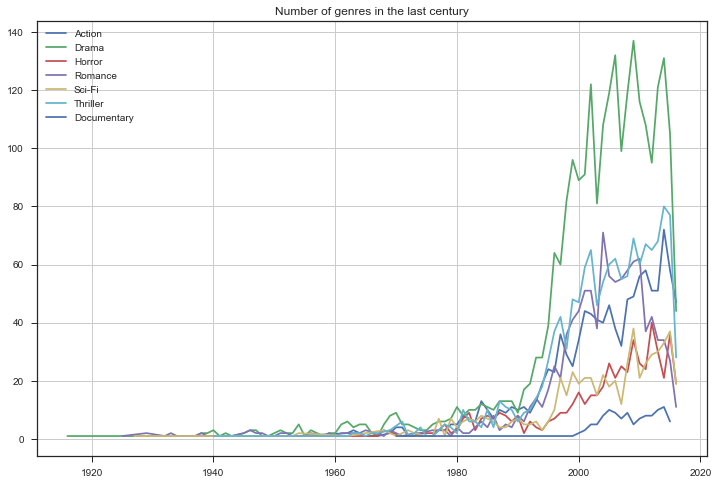

In [109]:
sb.set_style("ticks")
genres = ["Action", "Drama", "Horror", "Romance", "Sci-Fi", "Thriller", "Documentary"]
nnyears = idf[idf["title_year"].notnull()]
for genre in genres:    
    isgenre = nnyears["genres"].str.contains(genre)
    genre_movies = nnyears[isgenre]
    genre_in_year = genre_movies["title_year"].value_counts()
    ax = genre_in_year.sort_index().plot(figsize=(12,8), title="Number of genres in the last century", legend=True, grid=True)
    ax.legend(["Action", "Drama", "Horror", "Romance", "Sci-Fi", "Thriller", "Documentary"])


In [34]:
lgens =idf["genres"].str.split("|")
nplgens = np.array(lgens)
print(lgens[:])
#actions = idf["Action" in lgens]

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

Average IMDB scores per director.

In [35]:
real = df[df["num_voted_users"]>4000]
director_avg_score = real.groupby("director_name")["imdb_score"].mean()
director_avg_score[director_avg_score.notnull()].sort_values()

director_name
Lawrence Kasanoff          1.700000
Vondie Curtis-Hall         2.100000
Alex Zamm                  2.300000
Roger Christian            2.400000
Jason Friedberg            2.600000
Craig Moss                 2.700000
Aaron Seltzer              2.700000
Kenneth Johnson            2.800000
Joseph Sargent             2.800000
Fred Savage                2.900000
Nnegest Likké              3.000000
Jim Goddard                3.000000
Vic Armstrong              3.100000
Charles Robert Carner      3.100000
Trent Cooper               3.100000
Christopher Leitch         3.200000
Tom Brady                  3.300000
Pitof                      3.300000
Don Michael Paul           3.300000
Bob Spiers                 3.300000
Anthony C. Ferrante        3.300000
Ian Iqbal Rashid           3.300000
Perry Andelin Blake        3.300000
Alan Metter                3.300000
Harold Cronk               3.400000
Troy Miller                3.400000
Damien Dante Wayans        3.500000
Robert Marcare